## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df=pd.merge(mouse_metadata,study_results,on="Mouse ID")

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count=combined_df.groupby(["Mouse ID"])
mice_count.count()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

combined_df.duplicated(subset=['Mouse ID', 'Timepoint'])

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

combined_df.loc[combined_df.duplicated(["Mouse ID"]), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=combined_df.drop_duplicates(["Mouse ID"])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count_df=clean_df["Mouse ID"].value_counts()
mice_count_df

p310    1
f278    1
o795    1
w584    1
l725    1
       ..
d251    1
c927    1
d133    1
t451    1
w193    1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_df=combined_df.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.

result = drug_df.agg({'Tumour Volume (mm3)': ['mean', 'median','var','std','sem']})
result

Tumour Volume (mm3)                                          
                            mean     median        var       std       sem
Drug Regimen                                                              
Capomulin              40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin               52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol              52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril               55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol               54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                54.033581  52.288934  61.168083  7.821003  0.581331
Propriva               52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane               40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn               54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol              53.236507  51.818479  48.533355  6.966589  0.516398

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

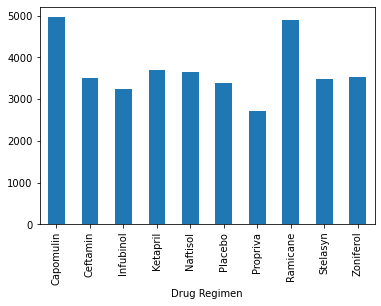

In [244]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_timepoints=combined_df.groupby(["Drug Regimen"])['Timepoint'].sum()
total_timepoints.plot.bar()


([<matplotlib.axis.XTick at 0x28209f7e248>,
 [Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Ceftamin'),
  Text(0, 0, 'Infubinol'),
  Text(0, 0, 'Ketapril'),
  Text(0, 0, 'Naftisol'),
  Text(0, 0, 'Placebo'),
  Text(0, 0, 'Propriva'),
  Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Stelasyn'),
  Text(0, 0, 'Zoniferol')])

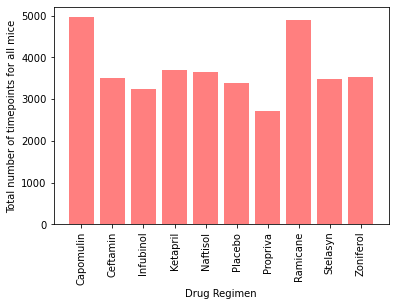

In [259]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
total_timepoints=combined_df.groupby(["Drug Regimen"], as_index=False)["Timepoint"].sum()
timepoints_df = pd.DataFrame(total_timepoints)
#timepoints_df
#bar_df=total_timepoints.plot.bar()
plt.ylabel("Total number of timepoints for all mice")
plt.xlabel("Drug Regimen")
x_axis = np.arange(len(timepoints_df))
tick_locations = [value+0.4 for value in x_axis]
plt.bar(x_axis, timepoints_df["Timepoint"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, timepoints_df["Drug Regimen"], rotation="vertical")
#total_timepoints.keys()

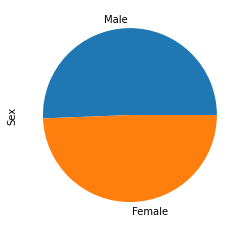

In [266]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df = combined_df['Sex'].value_counts()
#sex_df
sex_df.plot.pie()


Male      958
Female    935
Name: Sex, dtype: int64


([<matplotlib.patches.Wedge at 0x2820d17aac8>,
 [Text(-0.7536615388097399, -0.933806342299588, 'Male'),
  Text(0.690856410575595, 0.8559891471079556, 'Female')],
 [Text(-0.43963589763901484, -0.5447203663414263, '50.6%'),
  Text(0.3768307694048699, 0.46690317114979385, '49.4%')])

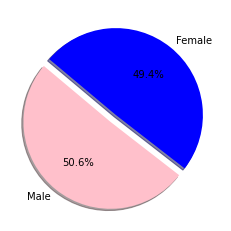

In [188]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_df = combined_df['Sex'].value_counts()
print(sex_df)
labels = ["Male", "Female"]


# The colours of each section of the pie chart
colours = ["pink", "blue"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0)
plt.pie(sex_df, explode=explode,labels=labels, colors=colours,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [271]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
new_df = combined_df.rename(columns = {'Drug Regimen':'Drug','Mouse ID':'MouseID'})
final_tumour=new_df[new_df.Drug.isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])]
sorted_tumour = final_tumour.sort_values(by=['MouseID','Timepoint'], ascending=False )
greatest_timepoint = sorted_tumour.drop_duplicates(subset = ['MouseID', 'Drug']).reset_index(drop = True)
#greatest_timepoint
greatest_timepoint.sort_values(by=['MouseID','Timepoint'])
#sorted_tumour
#sorted_tumour.to_csv("untitled.txt", index=False, header=True)

,MouseID,Drug,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
99,a203,Infubinol,Female,20,23,45,67.973419,2
98,a251,Infubinol,Female,21,25,45,65.525743,1
97,a275,Ceftamin,Female,20,28,45,62.999356,3
96,a411,Ramicane,Male,3,22,45,38.407618,1
95,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
4,y769,Ceftamin,Female,6,27,45,68.594745,4
3,y793,Capomulin,Male,17,17,45,31.896238,2
2,y865,Ceftamin,Male,23,26,45,64.729837,3
1,z578,Ramicane,Male,11,16,45,30.638696,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumour vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumour volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest


## Line and Scatter Plots

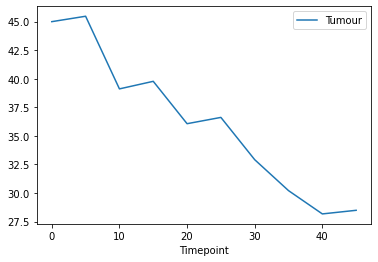

In [298]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
lineplot_df = combined_df.rename(columns = {'Drug Regimen':'Drug','Mouse ID':'MouseID','Tumour Volume (mm3)':'Tumour','Weight (g)':'Weight'})
capomulin_df=lineplot_df[lineplot_df.Drug.isin(["Capomulin"])]
capomulin_df
#cdf=capomulin_df.groupby(["MouseID"])
cdf = capomulin_df[capomulin_df.MouseID.isin(["x401"])]
#capomulin_df.plot.line()
cdf.plot(x='Timepoint', y='Tumour');
#plt.ylabel("Tumour volume")
#plt.xlabel("Timepoint")
#x_axis = (capomulin_df["Timepoint"])
#tick_locations = [value+0.4 for value in x_axis]
#plt.plot(x_axis, capomulin_df["Timepoint"], color='r', alpha=0.5)
#plt.xticks(tick_locations, capomulin_df["Tumour"], rotation="vertical")

Text(0, 0.5, 'Average Tumour')

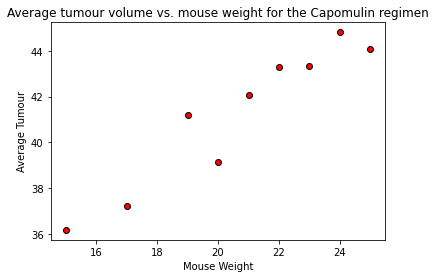

In [313]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
mouse_df=capomulin_df.groupby(["Weight"],as_index=False)['Tumour'].mean()
scatter_df=pd.DataFrame(mouse_df)
scatter_df
plt.scatter(scatter_df["Weight"],scatter_df["Tumour"], marker="o", facecolors="red", edgecolors="black")
plt.title("Average tumour volume vs. mouse weight for the Capomulin regimen")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumour")

## Correlation and Regression

The correlation coefficient for mouse weight and average tumour volume for the Capomulin regimen is 0.95


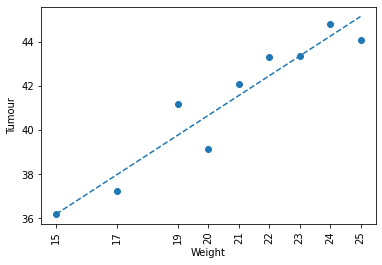

In [320]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
print(f"The correlation coefficient for mouse weight and average tumour volume for the Capomulin regimen is {round(st.pearsonr(scatter_df['Weight'],scatter_df['Tumour'])[0],2)}")
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(scatter_df['Weight'], scatter_df['Tumour'])      
vc_fit = vc_slope * scatter_df['Weight'] + vc_int
Weight = scatter_df.iloc[:,0]
Tumour = scatter_df.iloc[:,1]
plt.scatter(Weight,Tumour)
plt.plot(Weight,vc_fit,"--")
plt.xticks(Weight, rotation=90)
plt.xlabel('Weight')
plt.ylabel('Tumour')
plt.show()
      